# Task 3: Comparison

In this task you will have to compare different groups in the data. You will have to select three groups and find out the differences among them. Every food type has a keyword assigned which defines its membership to a certain group. The following groups are available in the data:

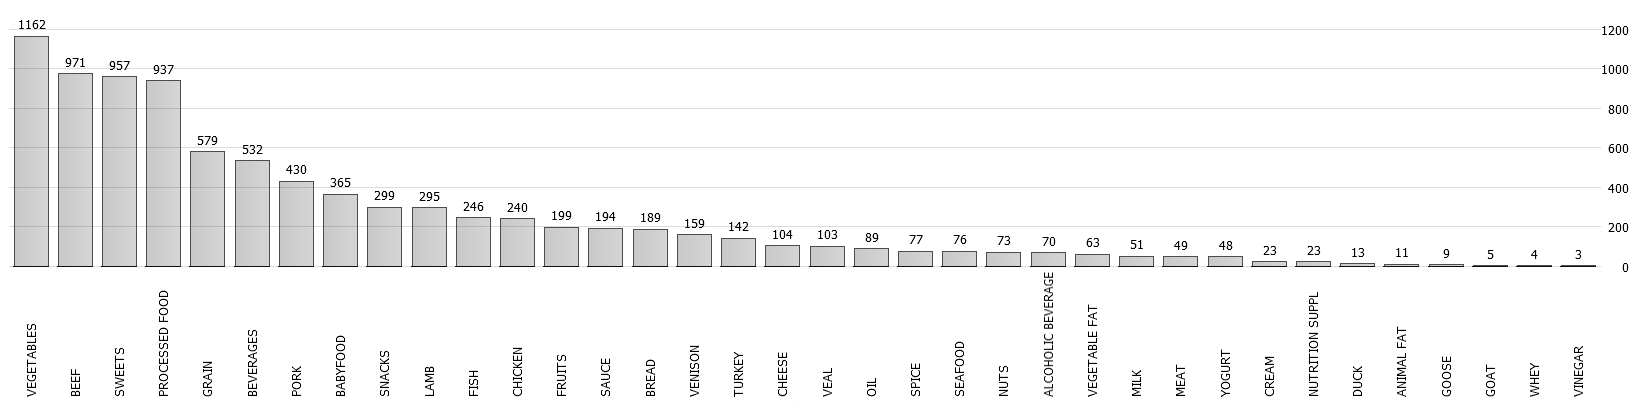

These are some suggestions for group comparisons, but you can also select others:
    
* BEEF vs. PORK
* BEEF vs. VEAL
* BEEF vs. VENISON
* BEVERAGES vs. ALCOHOLIC BEVERAGES
* FISH vs. SEAFOOD
* CHICKEN vs. TURKEY
* ANIMAL FAT vs. VEGETABLE FAT

You may also further filter the groups (e.g., use only cereals in the GRAIN group) if you think that the groups are too heterogeneous, or do in-groups comparisons (e.g., compare food from restaurants against food from fast food chains in the PROCESSED FOOD group). The selected groups do not have to be of the same size.

Statistical analysis: Use the Python functionalities to identify differences.
    
Visualization: Use radar charts, or any other visualization you would prefer, to identify differences. Use the Python plotting functionalities, for example pyplot.
    
Please answer the following questions in the final report:

* Which groups did you use and why?
* Describe the differences among the three groups.
* Which Python functionalities did you employ for the statistical analysis and which visualization type did you use?
* Was it easier to do the comparison with statistical analysis only, or by employing visualization?

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from math import ceil
import seaborn as sn
from itertools import combinations
import matplotlib.cm as cm


# The following instructs graphical plots to appear directly in the notebook.
%matplotlib inline

In [69]:
dataset = pd.read_csv(filepath_or_buffer = 'USDA_Food_Database.csv',sep=';', decimal = ",")
dataset = dataset.dropna()

headerWithValues = ['Water_(g)','Energy_(kcal)','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)','Iron_(mg)','Magnesium_(mg)','Phosphorus_(mg)','Potassium_(mg)','Sodium_(mg)','Zinc_(mg)','Copper_(mg)','Manganese_(mg)','Selenium_(µg)','Vit_C_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Panto_Acid_mg)','Vit_B6_(mg)','Folate_Tot_(µg)','Folic_Acid_(µg)','Food_Folate_(µg)','Folate_DFE_(µg)','Choline_Tot_ (mg)','Vit_B12_(µg)','Vit_A_(µg)','Retinol_(µg)','Alpha_Carot_(µg)','Beta_Carot_(µg)','Beta_Crypt_(µg)','Lycopene_(µg)','Lut+Zea_ (µg)','Vit_E_(mg)','Vit_D_(µg)','Vit_K_(µg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)','Cholestrl_(mg)']
headerWithValuesAndKeyword = ['Keyword','Water_(g)','Energy_(kcal)','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)','Iron_(mg)','Magnesium_(mg)','Phosphorus_(mg)','Potassium_(mg)','Sodium_(mg)','Zinc_(mg)','Copper_(mg)','Manganese_(mg)','Selenium_(µg)','Vit_C_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Panto_Acid_mg)','Vit_B6_(mg)','Folate_Tot_(µg)','Folic_Acid_(µg)','Food_Folate_(µg)','Folate_DFE_(µg)','Choline_Tot_ (mg)','Vit_B12_(µg)','Vit_A_(µg)','Retinol_(µg)','Alpha_Carot_(µg)','Beta_Carot_(µg)','Beta_Crypt_(µg)','Lycopene_(µg)','Lut+Zea_ (µg)','Vit_E_(mg)','Vit_D_(µg)','Vit_K_(µg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)','Cholestrl_(mg)']

datasetValues = dataset[headerWithValues]
keywords = dataset.Keyword.unique()
print(keywords)

['ANIMAL FAT' 'OIL' 'CHEESE' 'CREAM' 'ALCOHOLIC BEVERAGE' 'MILK' 'SWEETS'
 'BEVERAGES' 'WHEY' 'YOGURT' 'CHICKEN' 'DUCK' 'GOOSE' 'VENISON'
 'NUTRITION SUPPL' 'GOAT' 'SPICE' 'VINEGAR' 'BABYFOOD' 'PORK' 'SAUCE'
 'VEGETABLE FAT' 'TURKEY' 'PROCESSED FOOD' 'FISH' 'VEGETABLES' 'MEAT'
 'BEEF' 'GRAIN' 'FRUITS' 'SEAFOOD' 'NUTS' 'LAMB' 'VEAL' 'BREAD' 'SNACKS']


In [3]:
#Scale
#from sklearn.preprocessing import scale
#scale_dataset = scale(datasetValues)
#dataset[headerWithValues] = scale(datasetValues)

In [79]:
dataByKeyword = {key: dataset.loc[dataset['Keyword'].isin([key])][headerWithValues] for key in keywords}
#now we have a dictory with key=keyword and value its dataframe with only numberValues

meanDataFrame = pd.DataFrame()
for key in dataByKeyword:
    meanDataFrame.append(dataByKeyword[key].mean(),ignore_index=True)
    
meanDataFrame.shape

dataset[headerWithValuesAndKeyword].groupby('Keyword').mean()



,Water_(g),Energy_(kcal),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_(µg),Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
Keyword,,,,,,,,,,,,,,,,,,,,,
ALCOHOLIC BEVERAGE,72.013684,165.157895,0.522105,1.083684,0.163158,9.463158,0.000000,8.048421,11.157895,0.129474,...,0.000000,0.000000,3.210526,0.035789,0.063158,0.126316,0.651737,0.305211,0.061000,6.157895
ANIMAL FAT,16.843333,717.333333,0.730000,80.173333,1.273333,0.996667,0.000000,0.060000,23.666667,0.030000,...,2.000000,0.000000,4.333333,2.003333,0.000000,6.200000,49.082333,21.441667,3.128000,218.333333
BABYFOOD,65.359463,167.228188,4.335839,6.695302,1.174295,22.464899,0.815436,15.038591,166.483221,3.788523,...,4.161074,40.818792,124.302013,2.125570,1.739597,10.781208,2.502953,2.130544,1.456416,5.476510
BEEF,63.115168,201.747204,25.275101,10.818188,1.153602,0.094318,0.004027,0.026398,13.729306,2.548523,...,0.163311,0.109620,0.024609,0.197785,0.114094,1.591051,4.318123,4.914340,0.532233,90.328859
BEVERAGES,72.795641,105.166667,2.311368,0.885214,1.054487,22.911838,0.877350,16.330085,74.038462,0.768419,...,16.128205,34.893162,24.414530,0.711838,0.262393,1.921368,0.384987,0.249051,0.134679,0.914530
BREAD,34.045684,278.378947,9.788316,5.234526,2.216421,48.689368,4.237895,5.463895,108.115789,3.192526,...,0.494737,0.000000,61.094737,0.540421,0.035789,3.964211,1.272779,1.748653,1.540568,9.000000
CHEESE,48.925932,300.711864,20.221356,22.446441,3.993051,4.413051,0.006780,2.437627,620.067797,0.401695,...,0.830508,0.016949,2.644068,0.337627,0.720339,2.435593,13.602119,6.294508,0.916915,73.118644
CHICKEN,61.361574,219.981481,24.095833,12.693611,1.432963,1.110093,0.021296,0.265278,28.546296,1.580648,...,3.138889,0.685185,101.240741,0.542593,0.604630,1.556481,3.622861,5.107731,2.556343,192.564815
CREAM,58.938667,246.266667,2.641333,18.183333,0.790000,19.430000,0.153333,13.433333,74.933333,0.168000,...,0.066667,0.000000,0.400000,0.660667,0.273333,2.660000,11.374667,4.503800,0.916800,35.400000


1 Water_(g)
2 Energy_(kcal)
3 Protein_(g)
4 Lipid_Tot_(g)
5 Ash_(g)
6 Carbohydrt_(g)
7 Fiber_TD_(g)
8 Sugar_Tot_(g)
9 Calcium_(mg)
10 Iron_(mg)
11 Magnesium_(mg)
12 Phosphorus_(mg)
13 Potassium_(mg)
14 Sodium_(mg)
15 Zinc_(mg)
16 Copper_(mg)
17 Manganese_(mg)
18 Selenium_(µg)
19 Vit_C_(mg)
20 Thiamin_(mg)
21 Riboflavin_(mg)
22 Niacin_(mg)
23 Panto_Acid_mg)
24 Vit_B6_(mg)
25 Folate_Tot_(µg)
26 Folic_Acid_(µg)
27 Food_Folate_(µg)
28 Folate_DFE_(µg)
29 Choline_Tot_ (mg)
30 Vit_B12_(µg)
31 Vit_A_(µg)
32 Retinol_(µg)
33 Alpha_Carot_(µg)
34 Beta_Carot_(µg)
35 Beta_Crypt_(µg)
36 Lycopene_(µg)
37 Lut+Zea_ (µg)
38 Vit_E_(mg)
39 Vit_D_(µg)
40 Vit_K_(µg)
41 FA_Sat_(g)
42 FA_Mono_(g)
43 FA_Poly_(g)
44 Cholestrl_(mg)
finish


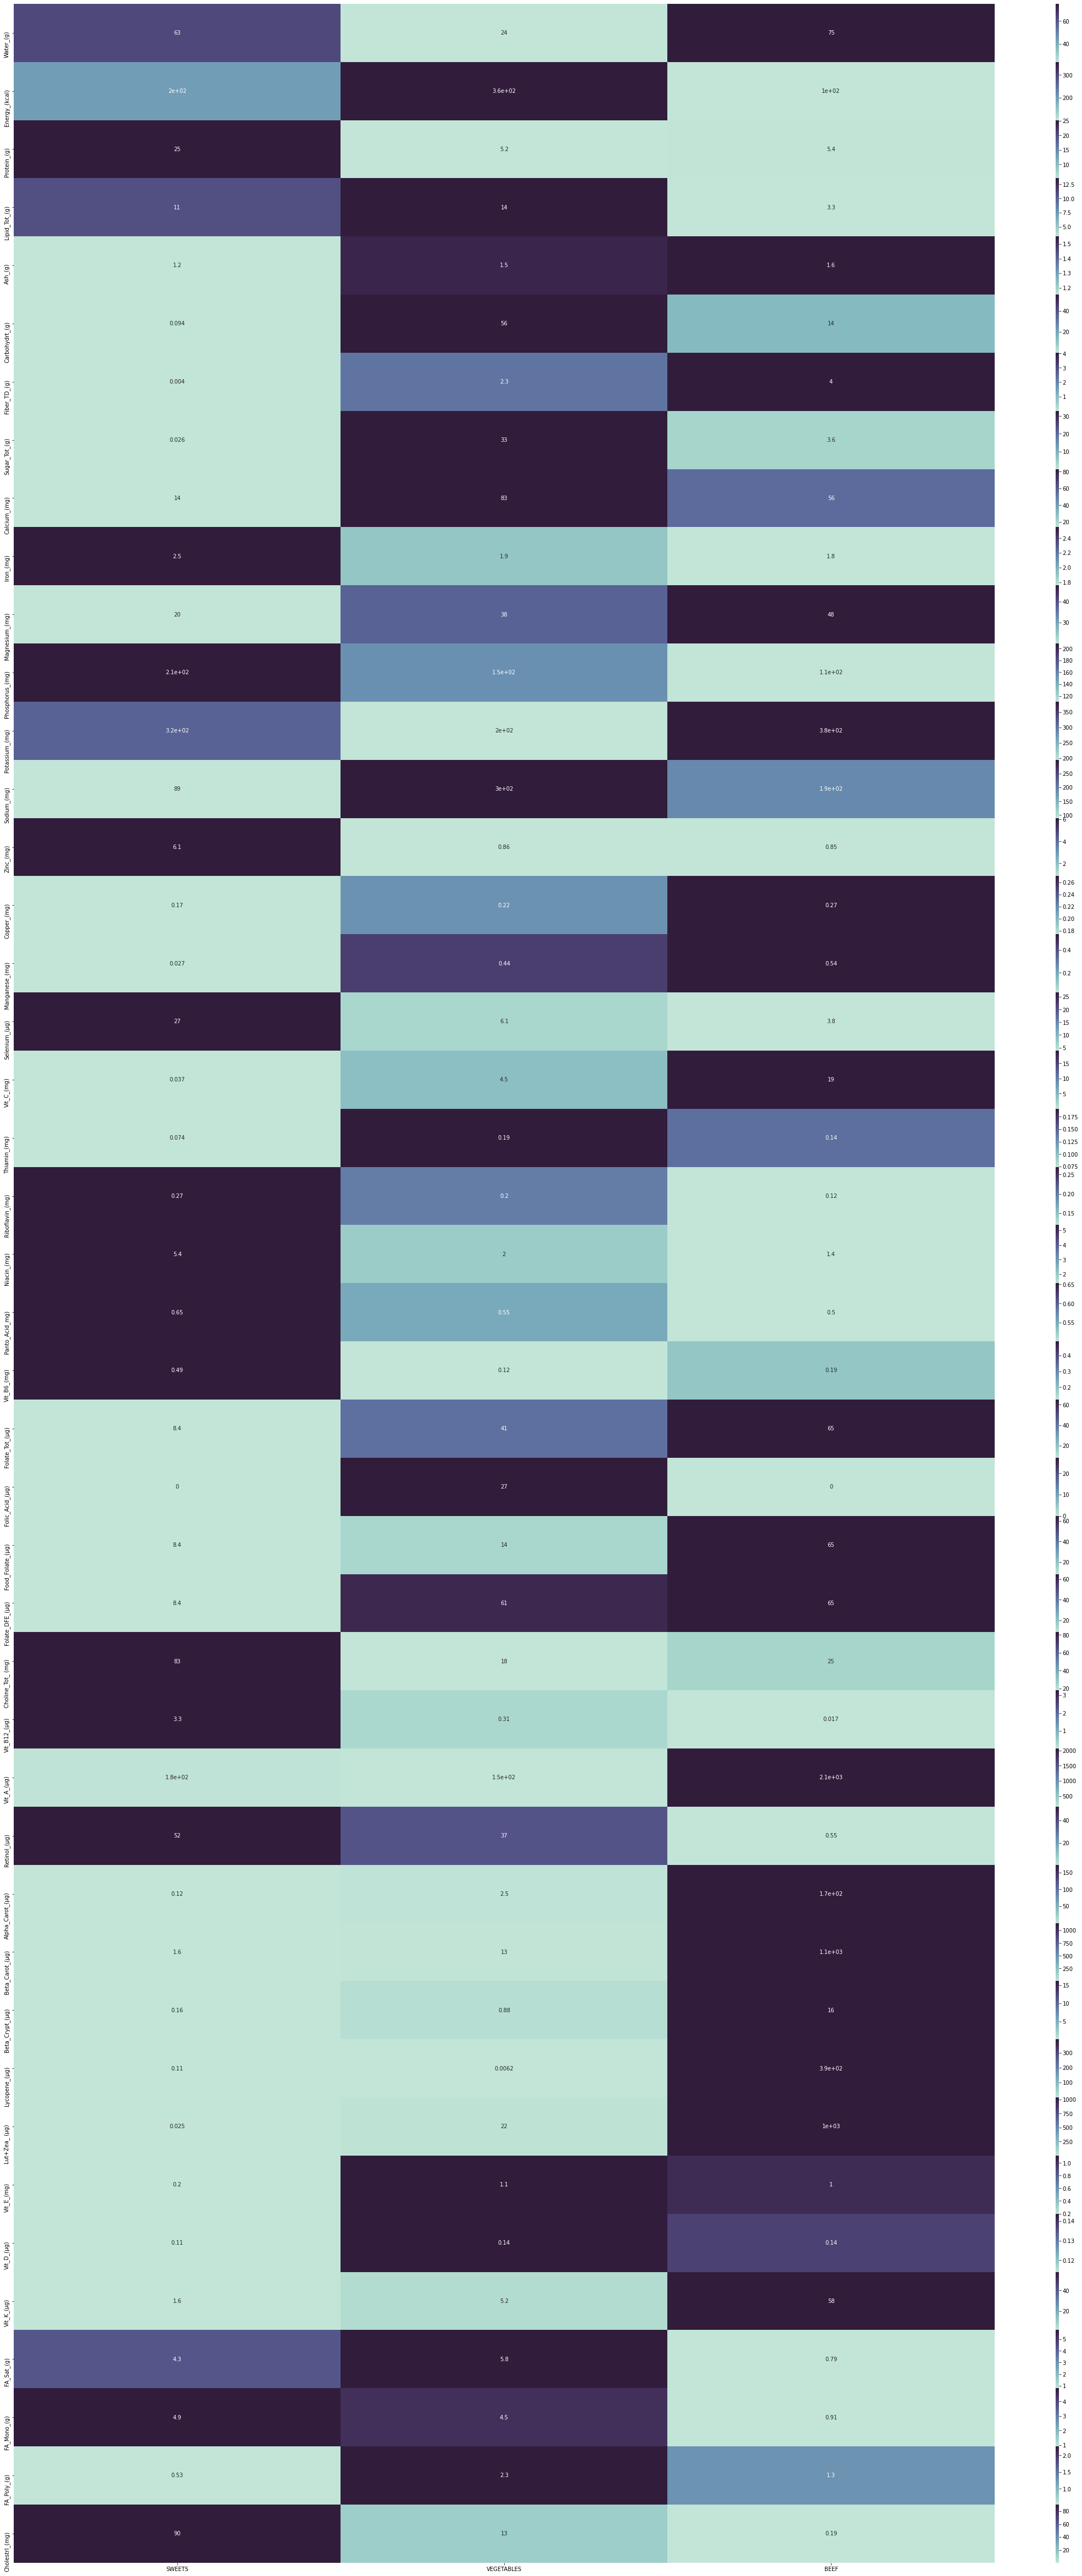

In [287]:
selectedData = dataset[dataset['Keyword'].str.contains('|'.join(choosenGroups))]
plt.figure(figsize=(40, 1.5*len(headerWithValues)))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0, wspace=0.4)
index = 1
for header in headerWithValues:
    print(str(index)+' '+header)
    plt.subplot(len(headerWithValues),1,index)
    meanData = selectedData[headerWithValuesAndKeyword].groupby('Keyword')[header].mean()
    meanDataReshape = np.asarray(meanData).reshape(len(choosenGroups),1)
    if(index == len(headerWithValues)):
        xticklabels = selectedData['Keyword'].unique()
    else:
        xticklabels = False  
    sn.heatmap(meanDataReshape.transpose(), yticklabels=[header],xticklabels=xticklabels,annot=True,cmap=sn.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
    index += 1
    
print('finish')
plt.savefig('meanPerKeywordSelectedGroups.jpg', bbox_inches='tight')
plt.show()



In [127]:
choosenGroups = ['BEEF','VEGETABLES','SWEETS']
groups = dataset[headerWithValuesAndKeyword].groupby('Keyword')
filteredGroups = groups.filter(lambda x: x.name in choosenGroups)

#plt.figure(figsize=(40, 1.5*len(headerWithValues)))
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0, wspace=0.4)
index = 1
for combination in combinations(choosenGroups,2):
    print(combination)
    #dataByKeyword[combination[0]].mean() - dataByKeyword[combination[1]].mean()
dataByKeyword['BEEF'].mean()


('BEEF', 'VEGETABLES')
('BEEF', 'SWEETS')
('VEGETABLES', 'SWEETS')


Water_(g)             63.115168
Energy_(kcal)        201.747204
Protein_(g)           25.275101
Lipid_Tot_(g)         10.818188
Ash_(g)                1.153602
Carbohydrt_(g)         0.094318
Fiber_TD_(g)           0.004027
Sugar_Tot_(g)          0.026398
Calcium_(mg)          13.729306
Iron_(mg)              2.548523
Magnesium_(mg)        20.031320
Phosphorus_(mg)      208.545861
Potassium_(mg)       316.595078
Sodium_(mg)           89.496644
Zinc_(mg)              6.121029
Copper_(mg)            0.174081
Manganese_(mg)         0.027378
Selenium_(µg)         26.728859
Vit_C_(mg)             0.037360
Thiamin_(mg)           0.074141
Riboflavin_(mg)        0.269107
Niacin_(mg)            5.352494
Panto_Acid_mg)         0.652861
Vit_B6_(mg)            0.490629
Folate_Tot_(µg)        8.371365
Folic_Acid_(µg)        0.000000
Food_Folate_(µg)       8.371365
Folate_DFE_(µg)        8.371365
Choline_Tot_ (mg)     82.945861
Vit_B12_(µg)           3.272103
Vit_A_(µg)           177.042506
Retinol_

## Radar Plot

In [185]:
meansPerGroup = dataset[headerWithValuesAndKeyword].groupby('Keyword').mean()
#meansPerGroup

In [280]:
datasetFiltered = dataset[dataset['Keyword'].str.contains('|'.join(choosenGroups))]

labels = datasetFiltered['Keyword'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
datasetFiltered.groupby('Keyword').mean()['Zinc_(mg)']

Keyword
BEEF          6.121029
SWEETS        0.864180
VEGETABLES    0.852194
Name: Zinc_(mg), dtype: float64

In [281]:
datasetFiltered.replace({'Keyword': {'BEEF':0,'SWEETS':1,'VEGETABLES':2}},inplace=True)
color =  np.array(['red','blue','green'])

allNutritionCombinations = combinations(headerWithValues,2)

allNutritionCombinationsCount = 0
for combination in allNutritionCombinations:
    #print(allNutritionCombinationsCount)
    allNutritionCombinationsCount = allNutritionCombinationsCount + 1
    
allNutritionCombinations = combinations(headerWithValues,2)
pltColumn = 12
pltRow = ceil(allNutritionCombinationsCount / pltColumn)
pltIndex = 1
plt.figure(figsize=(5*pltColumn, 5*pltRow))
print(allNutritionCombinationsCount)
colors = cm.rainbow(np.linspace(0, 1, len(choosenGroups)))
for combination in allNutritionCombinations:
    if(pltIndex%50 == 0):
        print(pltIndex)
    plt.subplot(pltRow,pltColumn,pltIndex)
    plt.scatter(marker='.',x=datasetFiltered[combination[0]],y=datasetFiltered[combination[1]],c = color[datasetFiltered['Keyword']])#c=colors[datasetFiltered['Keyword']]
    plt.xlabel(combination[0])
    plt.ylabel(combination[1])
    plt.title('Combination '+combination[0]+','+combination[1] +' ')
    pltIndex +=1
print('finish')
plt.savefig('plotChoosenByGroup.jpg', bbox_inches='tight')
print('finish save')
plt.show()


C:\tools\Anaconda3\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


946
50
100


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002FAD66B8678> (for post_execute):


KeyboardInterrupt: 

In [232]:
colors = cm.rainbow(np.linspace(0, 1, len(choosenGroups)))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])